https://pyastronomy.readthedocs.io/en/latest/

In [1]:
import numpy as np
import matplotlib.pylab as plt

from __future__ import print_function, division

In [2]:
#Magnitude conversions
from PyAstronomy import pyasl

absMagSun = 4.75 # 태양의 절대 등급
print("Absolute bolometric magnitude of the Sun: ", absMagSun)
print("  Absolute luminosity [erg/s]: ", pyasl.absMagToPower(absMagSun))

Absolute bolometric magnitude of the Sun:  4.75
  Absolute luminosity [erg/s]:  3.846e+33


In [3]:
?pyasl.absMagToPower

Signature: pyasl.absMagToPower(am, absMagSun=4.75, absLumSun=3.846e+33)
Docstring:
Convert absolute magnitude to power scale

The default values for the absolute magnitude and luminosity
of the Sun are adopted from Harmanec and Prsa 2011
(2011PASP..123..976H).

Parameters
----------
am : float
    Absolute magnitude.
absMagSun : float, optional
    Absolute magnitude of the Sun.
absLumSun : float, optional
    Absolute luminosity of the Sun.
    The default is given in units of erg/s.

Returns
-------
Power : float
    Total emitted power. Same units as `absLumSun`;
    the default corresponds to erg/s.
File:      c:\users\jimin\appdata\local\programs\python\python311\lib\site-packages\pyastronomy\pyasl\asl\magnitudes.py
Type:      function

In [4]:
?pyasl.PyAstronomy

Type:        module
String form: <module 'PyAstronomy' from 'c:\\Users\\jimin\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\PyAstronomy\\__init__.py'>
File:        c:\users\jimin\appdata\local\programs\python\python311\lib\site-packages\pyastronomy\__init__.py
Docstring:   <no docstring>

In [5]:
?pyasl.PyAstronomy.six

Type:        module
String form: <module 'six' from 'C:\\Users\\jimin\\AppData\\Roaming\\Python\\Python311\\site-packages\\six.py'>
File:        c:\users\jimin\appdata\roaming\python\python311\site-packages\six.py
Docstring:   Utilities for writing code that runs on Python 2 and 3

5000 K integral: 3.239e+07 W/m**2 (Stefan-Boltzmann predicts 3.544e+07 W/m**2)
7000 K integral: 1.311e+08 W/m**2 (Stefan-Boltzmann predicts 1.361e+08 W/m**2)


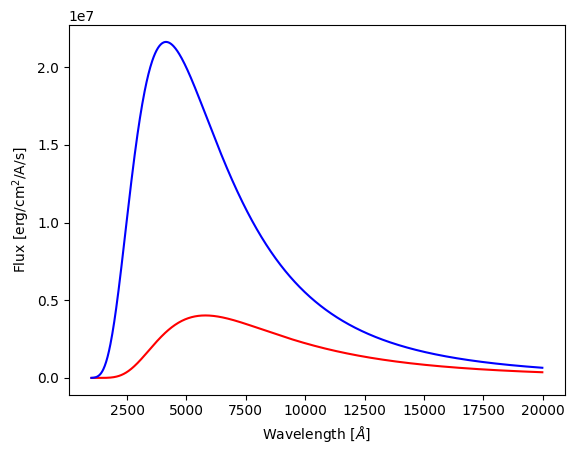

In [6]:
#Planck’s radiation law
from PyAstronomy.pyasl import planck

# Define wavelength in meters
lam = np.arange(1000.0*1e-10, 20000.*1e-10, 20e-10)

# Get the Planck spectrum in [W/(m**2 m)] for a temperature of 7000 K
s7 = planck(7000., lam=lam)
# Get the Planck spectrum in [W/(m**2 m)] for a temperature of 5000 K
s5 = planck(5000., lam=lam)

# Convert into erg/(cm**2 * A * s)
s5erg = s5 * 1e-7
s7erg = s7 * 1e-7

# Integrate the spectrum and compare with Stefan-Boltzmann law
i5 = np.sum(s5) * (lam[1] - lam[0])
i7 = np.sum(s7) * (lam[1] - lam[0])

print("5000 K integral: %.3e W/m**2 (Stefan-Boltzmann predicts %.3e W/m**2)" % (i5, (5.67e-8*5000.**4)))
print("7000 K integral: %.3e W/m**2 (Stefan-Boltzmann predicts %.3e W/m**2)" % (i7, (5.67e-8*7000.**4)))

plt.xlabel("Wavelength [$\AA$]")
plt.ylabel("Flux [erg/cm$^2$/A/s]")
plt.plot(lam*1e10, s5erg, 'r-')
plt.plot(lam*1e10, s7erg, 'b-')
plt.show()

Maximal difference (without outer 100 bins):  4.860716056764858e-06


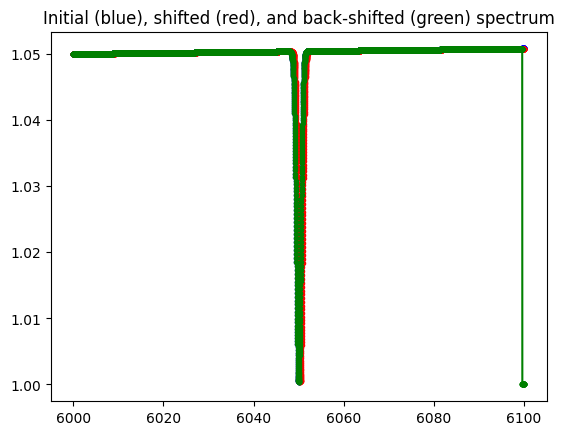

In [7]:

# Create a "spectrum" with 0.01 A binning ...
wvl = np.linspace(6000., 6100., 10000)
# ... a gradient in the continuum ...
flux = np.ones(len(wvl)) + (wvl/wvl.min())*0.05
# ... and a Gaussian absorption line
flux -= np.exp(-(wvl-6050.)**2/(2.*0.5**2))*0.05

# Shift that spectrum redward by 20 km/s using
# "firstlast" as edge handling method.
nflux1, wlprime1 = pyasl.dopplerShift(wvl, flux, 20., edgeHandling="firstlast")

# Shift the red-shifted spectrum blueward by 20 km/s, i.e.,
# back on the initial spectrum.
nflux2, wlprime = pyasl.dopplerShift(wvl, nflux1, -20.,
                                     edgeHandling="fillValue", fillValue=1.0)

# Check the maximum difference in the central part
indi = np.arange(len(flux)-200) + 100
print("Maximal difference (without outer 100 bins): ",
      max(np.abs(flux[indi]-nflux2[indi])))

# Plot the outcome
plt.title("Initial (blue), shifted (red), and back-shifted (green) spectrum")
plt.plot(wvl, flux, 'b.-')
plt.plot(wvl, nflux1, 'r.-')
plt.plot(wvl, nflux2, 'g.-')
plt.show()

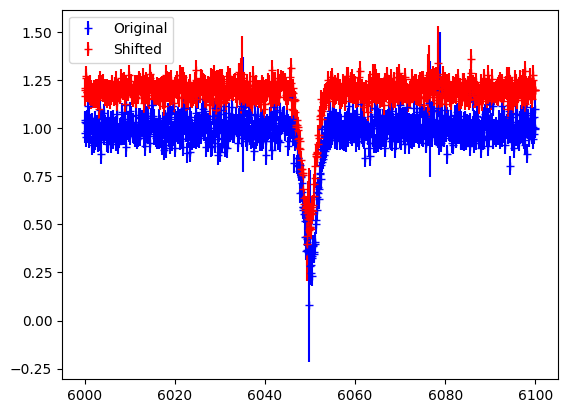

In [8]:
#Doppler shifting a spectrum

# Create a "spectrum" with 0.01 A binning ...
wvl = np.linspace(6000., 6100., 1000)
# ... and a Gaussian absorption line
flux = 1 - 0.7 * np.exp(-(wvl-6050.)**2/(2.*1.5**2))
# Add some noise
err = np.ones_like(flux) * 0.05
# Some points with unusually large error
err[500] = 0.3
err[[351, 497, 766, 787]] = 0.3
flux += np.random.normal(0, err, len(flux))

# Shift that spectrum to the blue by 17 km/s including errors
nflux1, wlprime1, nerr1 = pyasl.dopplerShift(wvl, flux, -17., edgeHandling="firstlast", err=err)

plt.errorbar(wvl, flux, yerr=err, fmt='b+', label="Original")
plt.errorbar(wvl, nflux1+0.2, yerr=nerr1, fmt='r+', label="Shifted")
plt.legend()
plt.show()

https://www.astropy.org/index.html

실습

1. 나만의 플랑크 외부 라이브러리 만들기

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


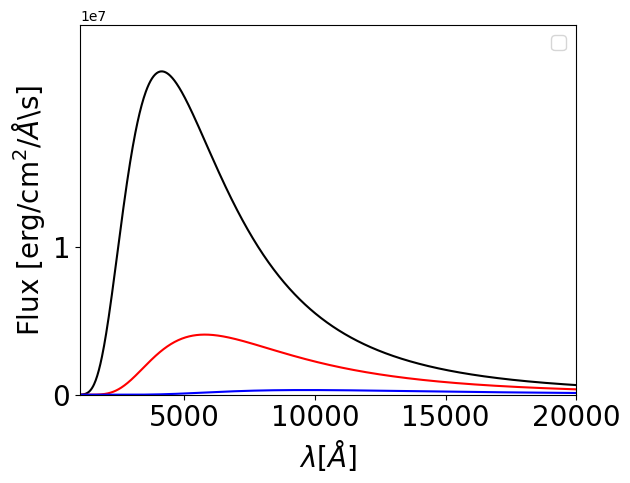

In [9]:
from my_func import planck_mj

lamb_arr = np.arange(1000*1e-10, 20000*1e-10, 20*1e-10)

flux7 = planck_mj(lamb_arr, 7000) * 1e-7
flux5 = planck_mj(lamb_arr, 5000) * 1e-7
flux3 = planck_mj(lamb_arr, 3000) * 1e-7

plt.plot(lamb_arr*1e10, flux7, color = 'black')
plt.plot(lamb_arr*1e10, flux5, color = 'red')
plt.plot(lamb_arr*1e10, flux3, color ='blue')

plt.xlabel(r"$\lambda [\AA]$", fontsize=20)
plt.ylabel(r"Flux [erg/cm$^2/\AA$\s]", fontsize=20)
plt.xlim([1000, 20000])
plt.ylim([1e4, 2.5e7])
plt.xticks([5000, 10000, 15000, 20000], fontsize=20)
plt.yticks([0, 1e7], fontsize=20)
plt.legend(fontsize=14)

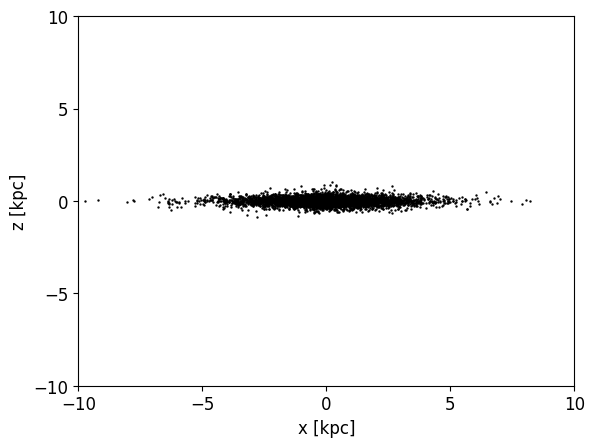

In [10]:
#2.
from my_class import galaxy

gal = galaxy()
gal.readfile('disk_position.txt')
gal.plot_galaxy(unit='kpc')

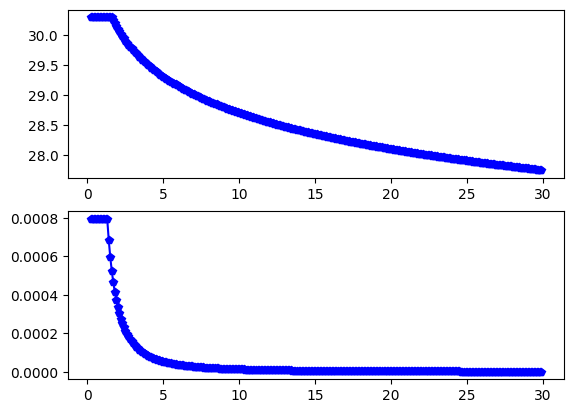

In [11]:
#3. 내부 함수 수정 후, inlog = False 로 다시 실행
p = pyasl.Pizzolato2003()

# Define array of rotation periods [days]
prot = np.arange(0.2, 30, 0.1)

lx = np.zeros(prot.size)
lxlbol = np.zeros(prot.size)

# B-V color of star
bv = 0.7

# Obtain ...
for i in range(prot.size):
    # ... log10 of X-ray luminosity
    lx[i] = p.log10lxbv(bv, prot[i])[0]
    # ... and log10(Lx/Lbol)
    lxlbol[i] = p.log10lxlbolbv(bv, prot[i], inlog = False)

# Plot result
plt.subplot(2, 1, 1)
plt.plot(prot, lx, 'bp-')
plt.subplot(2, 1, 2)
plt.plot(prot, lxlbol, 'bp-')
plt.show()

In [12]:
# 수정 후 내부함수
def log10lxlbolbv(self, bv, pr, inlog = True):
    """
      Estimate log10(Lx/Lbol)
      
      Parameters
      ----------
      bv : float
          B-V color [mag]
      pr : float
          Rotation period [d]
      
      Returns
      -------
      log10(Lx/Lbol) : float
          X-ray luminosity estimate
      Error log10(Lx/Lbol) : float
          Uncertainty
    """
    self._checkPr(pr)
    row = self._findRow(self._tab4, bv, "B-V")

    if inlog == True: 
      return self._calcVal(self._tab4, row, 5, 9, pr)[0]
    else:
      return 10**(self._calcVal(self._tab4, row, 5, 9, pr)[0])